<a href="https://colab.research.google.com/github/RaviNaik/ERA-S5/blob/main/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE BLOCK: 1

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch import nn

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

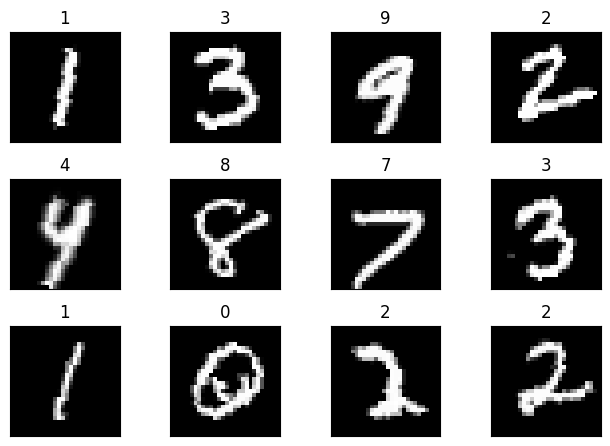

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [7]:
from model import Net

CODE BLOCK: 8

CODE BLOCK: 9

In [9]:
from utils import train, test

CODE BLOCK: 10

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.7057 Batch_id=117 Accuracy=36.95: 100%|██████████| 118/118 [00:29<00:00,  3.95it/s]


Test set: Average loss: 0.0013, Accuracy: 46908/60000 (78.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2736 Batch_id=117 Accuracy=91.13: 100%|██████████| 118/118 [00:26<00:00,  4.52it/s]


Test set: Average loss: 0.0003, Accuracy: 57119/60000 (95.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0698 Batch_id=117 Accuracy=95.73: 100%|██████████| 118/118 [00:25<00:00,  4.70it/s]


Test set: Average loss: 0.0003, Accuracy: 57496/60000 (95.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1189 Batch_id=117 Accuracy=96.72: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]


Test set: Average loss: 0.0002, Accuracy: 58347/60000 (97.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1179 Batch_id=117 Accuracy=97.30: 100%|██████████| 118/118 [00:25<00:00,  4.69it/s]


Test set: Average loss: 0.0001, Accuracy: 58606/60000 (97.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0519 Batch_id=117 Accuracy=97.70: 100%|██████████| 118/118 [00:24<00:00,  4.77it/s]


Test set: Average loss: 0.0001, Accuracy: 58723/60000 (97.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0900 Batch_id=117 Accuracy=97.89: 100%|██████████| 118/118 [00:24<00:00,  4.80it/s]


Test set: Average loss: 0.0001, Accuracy: 58880/60000 (98.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0672 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]


Test set: Average loss: 0.0001, Accuracy: 58859/60000 (98.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0165 Batch_id=117 Accuracy=98.16: 100%|██████████| 118/118 [00:25<00:00,  4.70it/s]


Test set: Average loss: 0.0001, Accuracy: 58798/60000 (98.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0891 Batch_id=117 Accuracy=98.32: 100%|██████████| 118/118 [00:24<00:00,  4.80it/s]


Test set: Average loss: 0.0001, Accuracy: 59029/60000 (98.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0393 Batch_id=117 Accuracy=98.44: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]


Test set: Average loss: 0.0001, Accuracy: 59231/60000 (98.72%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0115 Batch_id=117 Accuracy=98.58: 100%|██████████| 118/118 [00:24<00:00,  4.86it/s]


Test set: Average loss: 0.0001, Accuracy: 59180/60000 (98.63%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0763 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [00:24<00:00,  4.85it/s]


Test set: Average loss: 0.0001, Accuracy: 59319/60000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0072 Batch_id=117 Accuracy=98.74: 100%|██████████| 118/118 [00:24<00:00,  4.83it/s]


Test set: Average loss: 0.0001, Accuracy: 59365/60000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0453 Batch_id=117 Accuracy=98.91: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]


Test set: Average loss: 0.0001, Accuracy: 59419/60000 (99.03%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0057 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]


Test set: Average loss: 0.0001, Accuracy: 59449/60000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0121 Batch_id=117 Accuracy=99.10: 100%|██████████| 118/118 [00:23<00:00,  4.99it/s]


Test set: Average loss: 0.0001, Accuracy: 59478/60000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0179 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [00:24<00:00,  4.83it/s]


Test set: Average loss: 0.0001, Accuracy: 59487/60000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0021 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:23<00:00,  5.03it/s]


Test set: Average loss: 0.0001, Accuracy: 59478/60000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0247 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]


Test set: Average loss: 0.0001, Accuracy: 59512/60000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

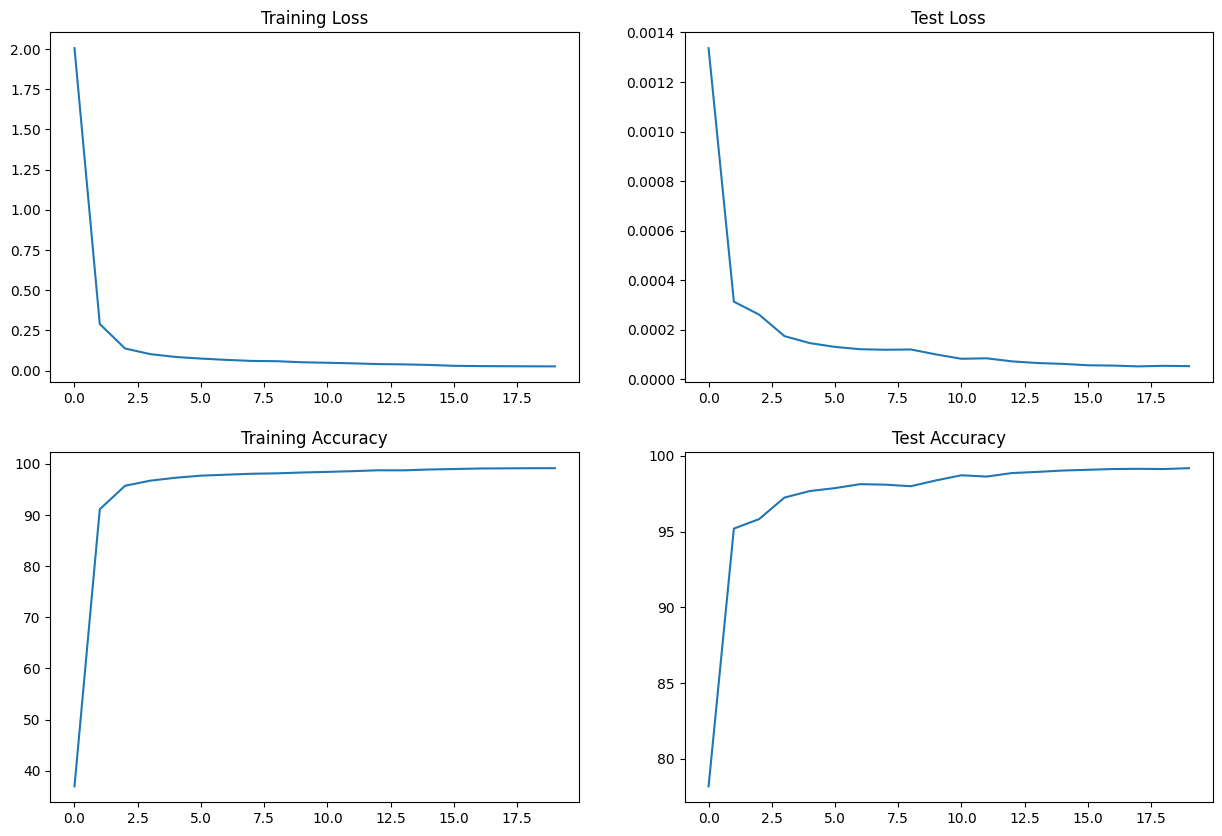

In [13]:
from utils import plot_results, train_acc, train_losses, test_acc, test_losses
plot_results(train_losses, train_acc, test_losses, test_acc)

In [14]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------
